#### Bodine Mazibuko

### EXPLORE Data Science Academy Classification Hackathon Overview
South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.
From South African Government

### Importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# libraries for NLP
import nltk
import re
import string 
from nltk.corpus import stopwords

# importing libraries for utility from sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import preprocessing
from sklearn.pipeline import Pipeline

# importing libraries for modelling form sklearn
from sklearn.linear_model import LogisticRegression

# Suppressing unnwarranted warnings
import warnings
warnings.filterwarnings("ignore")

### Loading the Data

In [2]:
# Importing train and test data
train_df = pd.read_csv('train_set.csv')
test_df = pd.read_csv('test_set.csv')


# displaying a few rows of both dataset
display(train_df.head())
display(test_df.head())

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


### Exploratory Data Analysis (EDA)

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


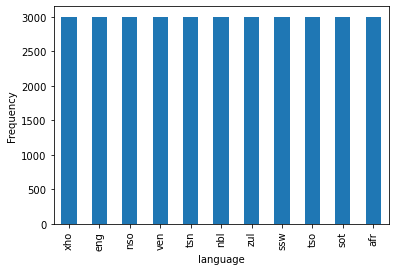

In [4]:
train_df.lang_id.value_counts().plot(kind='bar')
plt.ylabel('Frequency')
plt.xlabel('language');

All of the 11 languages have equal number of observations, the data is balanced.

Looking through the data on excel, some html characters where found.

In [5]:
def cleaning_text(text):
    ''''replace the html characters with " "
    will convert to lower case
    will split and join the words'''
    text = re.sub('[^a-zA-Z#]', ' ',text)
    text = re.sub('<.*?>', ' ', text)
    text = text.lower()
    # will split and join the words
    text=' '.join(text.split())
    
    return text

In [8]:
#applying function to the train and test data
train_df['cleaned'] = train_df['text'].apply(cleaning_text)
test_df['cleaned'] = test_df['text'].apply(cleaning_text)
display(train_df.head())
display(test_df.head())

,lang_id,text,cleaned
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqo siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,i dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...,the province of kwazulu natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...,o netefat a gore o ba file dilo ka moka t e le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...


,index,text,cleaned
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele...",mmasepala fa maemo a a kgethegileng a letlelel...
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.,tshivhumbeo tshi fana na ngano dza vhathu
3,4,Kube inja nelikati betingevakala kutsi titsini...,kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.,winste op buitelandse valuta


### Modelling

In [9]:
#setting features and target
X = train_df['cleaned']
X_1 = test_df['cleaned']
y= train_df['lang_id']

In [11]:
# split the target and features into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.linear_model import LogisticRegression, SGDClassifier

lr = LogisticRegression(random_state=42,multi_class='ovr',n_jobs=1, C=1e5,max_iter=4000)

In [13]:
#building a pipeline
pipe = Pipeline([('vect',CountVectorizer(stop_words='english',
                                         min_df=2,
                                         max_df=0.9,
                                         ngram_range=(3,6),analyzer=('char'))),
                 ('tfidf',TfidfTransformer()),
                 ('model',lr)])

In [14]:

pipe.fit(X_train,y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(analyzer='char', max_df=0.9, min_df=2,
                                 ngram_range=(3, 6), stop_words='english')),
                ('tfidf', TfidfTransformer()),
                ('model',
                 LogisticRegression(C=100000.0, max_iter=4000,
                                    multi_class='ovr', n_jobs=1,
                                    random_state=42))])

In [15]:
#testing model with the test data
pred_test= pipe.predict(X_1)

In [16]:
model_output = pd.DataFrame(pred_test,columns=['lang_id'])
model_output.head(20)

,lang_id
0,tsn
1,nbl
2,ven
3,ssw
4,afr
5,nso
6,eng
7,sot
8,zul
9,eng


In [17]:
#saving predictions to a csv file
output = pd.DataFrame({"index":test_df['index']}) 
submission = output.join(model_output) 
submission.to_csv("submission.csv", index = False)